# 2.5 Play with train_test_split 


## Preparation of the data
This part is similar to file name word_features except it does not include as much documentation since it represent a copy. This file will train the same models with the same hyperparameters found previously using gridsearch but with different train/test ratio.

In [1]:
import sklearn
import gensim
import nltk
import warnings
warnings.filterwarnings("ignore") # To suppress warning messages and keep interface clean
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for graphing and data visualization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

file = json.load(gzip.open('goemotions.json.gz', 'r'))
data = np.asarray(file) # Store JSON file contents into a numpy array

# Split data (features (X) and labels (y))
X_posts = data[:,0:1]
y_emotion = data[:,1:2]
y_sentiment = data[:,2:3]


# Create CountVectorizer object and fit the X inputs to the object
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(X_posts.ravel())

## Splitting of the dataset: 20% training, 80% testing

In [2]:

# Split into training and test sets for the emotion classifier
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.8)

# Split into training and test sets for the sentiment classifier
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X, y_sentiment, 
                                                                                            test_size=0.8)

## Model training and testing - Results
### Base Multinomial Naive Bayes Classifier


Emotion Classification Performance Report - Base Multinomial Naive Bayes Classifier - 20/80
                precision    recall  f1-score   support

    admiration       0.53      0.16      0.25      8459
     amusement       0.57      0.06      0.11      4908
         anger       0.44      0.03      0.05      4161
     annoyance       0.17      0.01      0.02      6698
      approval       0.23      0.02      0.04      9010
        caring       0.31      0.00      0.01      2821
     confusion       0.20      0.00      0.00      3983
     curiosity       0.30      0.01      0.01      4724
        desire       0.60      0.00      0.00      1733
disappointment       0.28      0.01      0.01      3701
   disapproval       0.19      0.01      0.02      6063
       disgust       0.51      0.02      0.03      2318
 embarrassment       0.33      0.00      0.00      1133
    excitement       0.27      0.00      0.01      2413
          fear       0.50      0.00      0.00      1414
     gratit

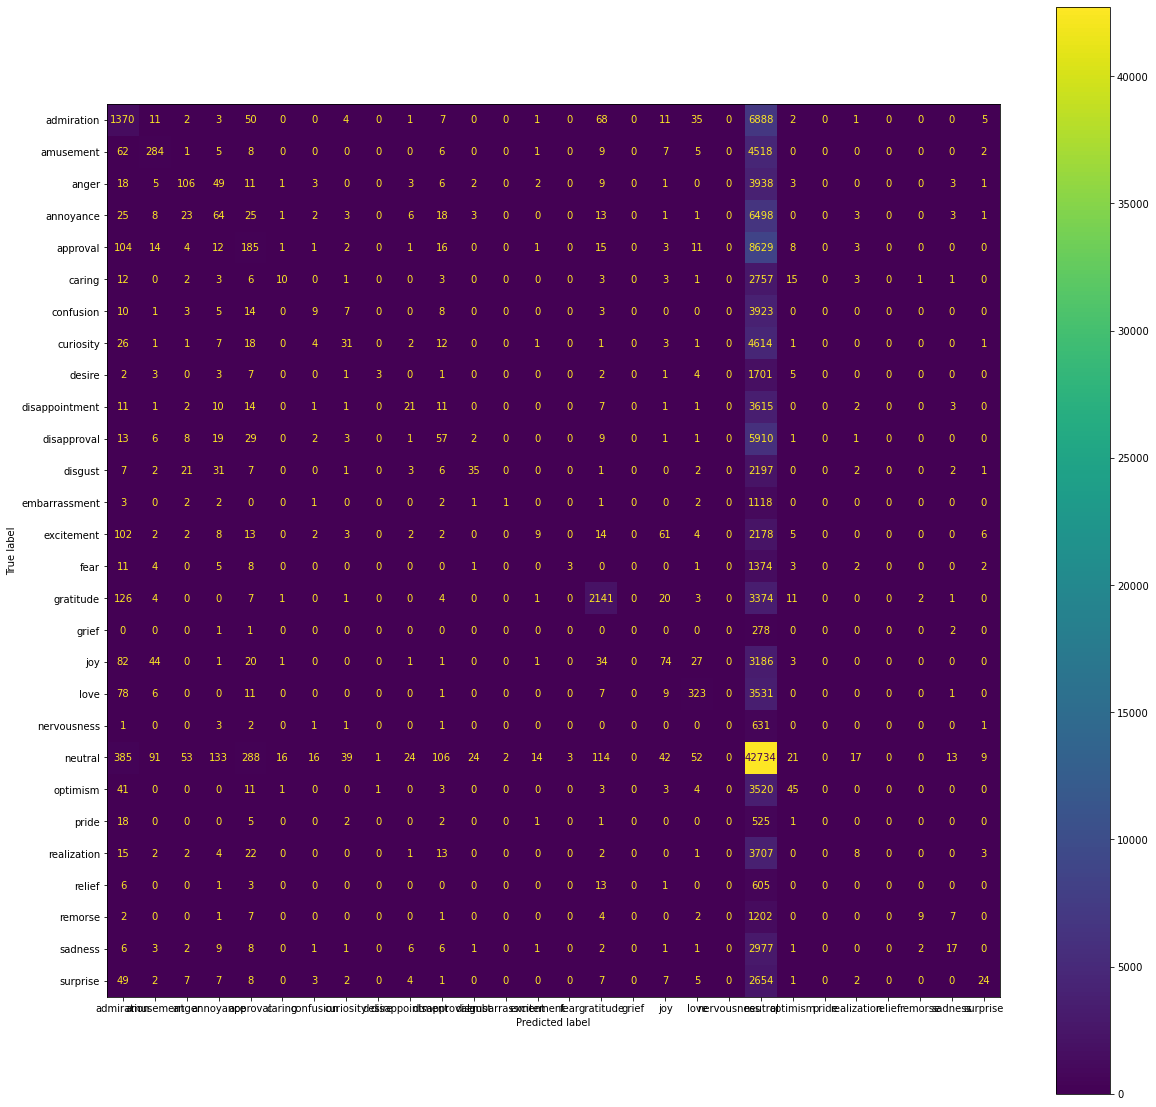

Sentiment Classification Performance Report - Base Multinomial Naive Bayes Classifier - 20/80
              precision    recall  f1-score   support

   ambiguous       0.43      0.07      0.13     15194
    negative       0.52      0.39      0.45     30921
     neutral       0.44      0.51      0.47     44291
    positive       0.56      0.72      0.63     47050

    accuracy                           0.51    137456
   macro avg       0.49      0.42      0.42    137456
weighted avg       0.50      0.51      0.48    137456



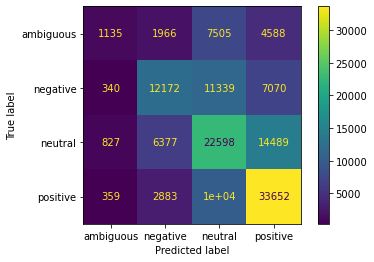

In [3]:


# Emotion Classification 
baseMNB_model = MultinomialNB() 
baseMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Multinomial Naive Bayes Classifier - 20/80")
prediction =  baseMNB_model.predict(X_test_emotion)
print(classification_report(y_test_emotion,prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMNB_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()


# Sentiment Classification 
baseMNB_model = MultinomialNB() 
baseMNB_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Multinomial Naive Bayes Classifier - 20/80")
prediction = baseMNB_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMNB_model.classes_)
disp.plot()
plt.show()

### Base Decision Tree Classifier 

Emotion Classification Performance Report - Base Decision Tree Classifier - 20/80
                precision    recall  f1-score   support

    admiration       0.39      0.42      0.41      8459
     amusement       0.43      0.46      0.44      4908
         anger       0.22      0.23      0.23      4161
     annoyance       0.12      0.12      0.12      6698
      approval       0.17      0.16      0.16      9010
        caring       0.16      0.15      0.16      2821
     confusion       0.17      0.17      0.17      3983
     curiosity       0.22      0.20      0.21      4724
        desire       0.21      0.17      0.19      1733
disappointment       0.12      0.11      0.11      3701
   disapproval       0.15      0.14      0.15      6063
       disgust       0.19      0.16      0.17      2318
 embarrassment       0.14      0.11      0.12      1133
    excitement       0.15      0.14      0.15      2413
          fear       0.33      0.27      0.30      1414
     gratitude       

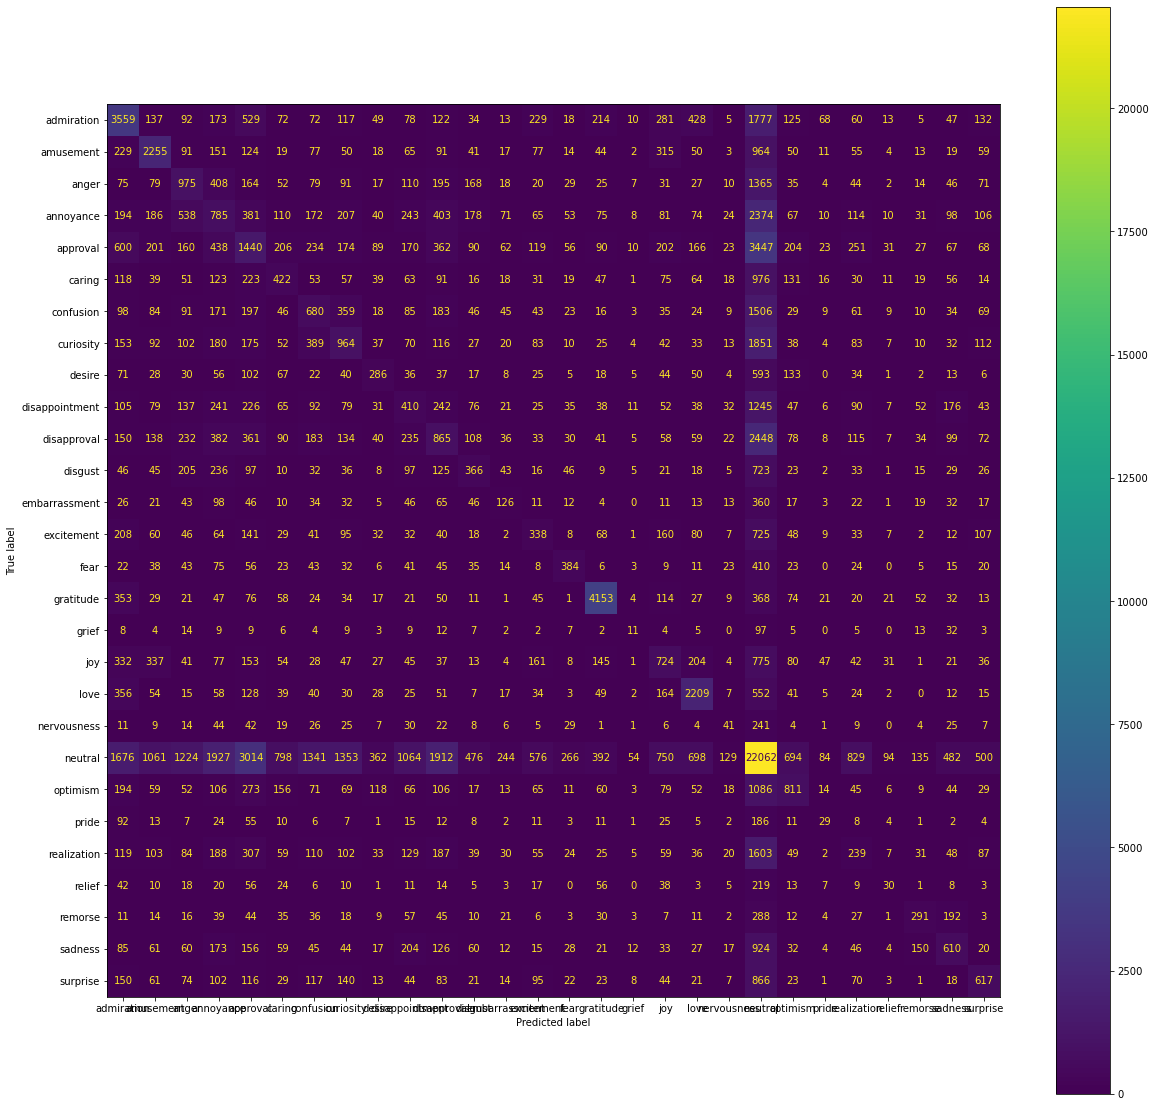

Sentiment Classification Performance Report - Base Decision Tree Classifier - 20/80
              precision    recall  f1-score   support

   ambiguous       0.29      0.30      0.29     15194
    negative       0.44      0.44      0.44     30921
     neutral       0.44      0.46      0.45     44291
    positive       0.61      0.58      0.60     47050

    accuracy                           0.48    137456
   macro avg       0.45      0.44      0.45    137456
weighted avg       0.48      0.48      0.48    137456



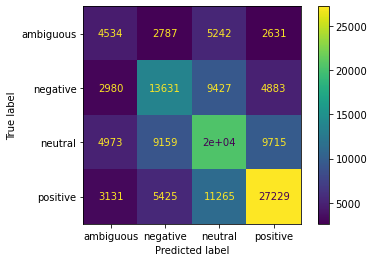

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseDT_model = DecisionTreeClassifier() 
baseDT_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Decision Tree Classifier - 20/80")
prediction = baseDT_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseDT_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
baseDT_model = DecisionTreeClassifier()
baseDT_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Decision Tree Classifier - 20/80")
prediction = baseDT_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseDT_model.classes_)
disp.plot()
plt.show()

### Base Multi-Layered Perceptron Classifier


Emotion Classification Performance Report - Base Multi-Layered Perceptron Classifier - 20/80
                precision    recall  f1-score   support

    admiration       0.40      0.39      0.39      8459
     amusement       0.43      0.33      0.37      4908
         anger       0.25      0.21      0.23      4161
     annoyance       0.13      0.14      0.14      6698
      approval       0.15      0.17      0.16      9010
        caring       0.17      0.18      0.17      2821
     confusion       0.16      0.16      0.16      3983
     curiosity       0.20      0.21      0.21      4724
        desire       0.21      0.17      0.19      1733
disappointment       0.11      0.13      0.12      3701
   disapproval       0.15      0.18      0.16      6063
       disgust       0.19      0.16      0.17      2318
 embarrassment       0.16      0.11      0.13      1133
    excitement       0.15      0.14      0.15      2413
          fear       0.37      0.26      0.30      1414
     grati

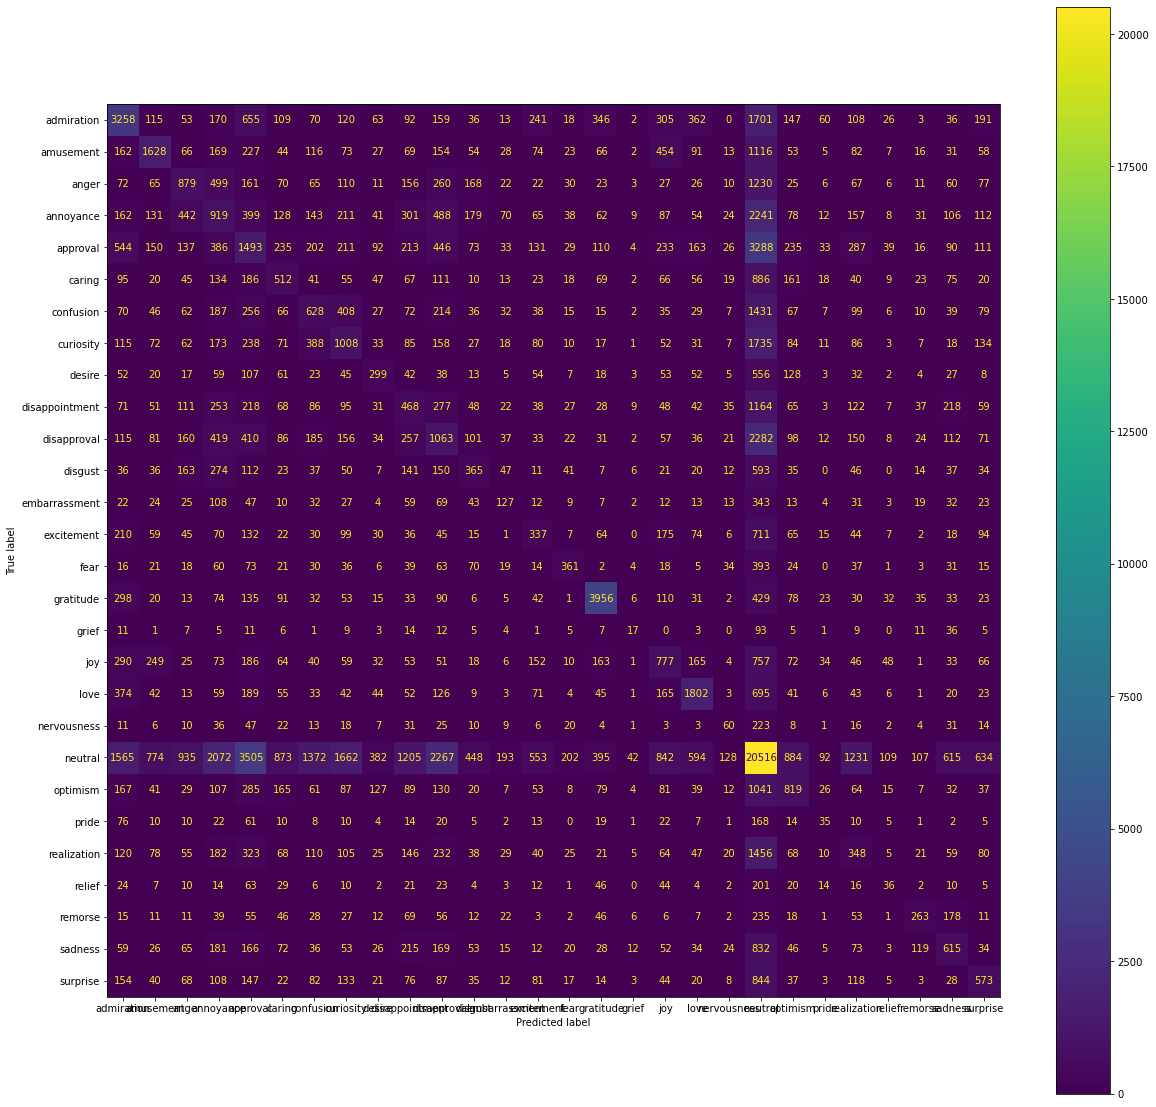

Sentiment Classification Performance Report - Base Multi-Layered Perceptron Classifier - 20/80
              precision    recall  f1-score   support

   ambiguous       0.30      0.28      0.29     15194
    negative       0.47      0.45      0.46     30921
     neutral       0.44      0.45      0.45     44291
    positive       0.60      0.61      0.60     47050

    accuracy                           0.49    137456
   macro avg       0.45      0.45      0.45    137456
weighted avg       0.49      0.49      0.49    137456



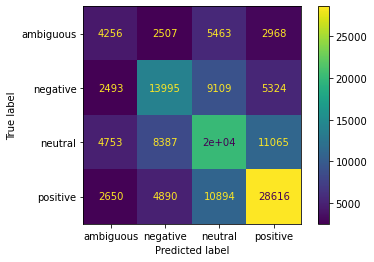

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseMLP_model = MLPClassifier() 
baseMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Multi-Layered Perceptron Classifier - 20/80")
prediction = baseMLP_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
baseMLP_model = MLPClassifier()
baseMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Multi-Layered Perceptron Classifier - 20/80")
prediction = baseMLP_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
disp.plot()
plt.show()

### Top Multinomial Naive Bayes Classifier
MISSING TRAINING AND RESULTS BC HYPER PARAMETERS NOT FOUND YET

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Grid search best alphafloat value
MNB_model = MultinomialNB()
hyper_parameters = {'alpha':(0, 0.5, 1, 1.5, 2, 2.5)}

gridSearchMNB = GridSearchCV(MNB_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMNB.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Multinomial Naive Bayes Classifier [EMOTION] Best Hyperparameter Configuration - 20/80:', gridSearchMNB.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMNB.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Multinomial Naive Bayes Classifier [SENTIMENT] Best Hyperparameter Configuration - 20/80:', gridSearchMNB.best_params_)

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Top Multinomial Naive Bayes Classifier [EMOTION] Best Hyperparameter Configuration - 20/80: {'alpha': 0}


/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Top Multinomial Naive Bayes Classifier [SENTIMENT] Best Hyperparameter Configuration - 20/80: {'alpha': 0.5}


Emotion Classification Performance Report - Top Multinomial Naive Bayes Classifier - 20/80
                precision    recall  f1-score   support

    admiration       0.37      0.36      0.37      8459
     amusement       0.37      0.33      0.35      4908
         anger       0.22      0.20      0.21      4161
     annoyance       0.12      0.11      0.11      6698
      approval       0.15      0.12      0.13      9010
        caring       0.15      0.16      0.16      2821
     confusion       0.15      0.14      0.15      3983
     curiosity       0.21      0.17      0.19      4724
        desire       0.16      0.15      0.16      1733
disappointment       0.11      0.10      0.10      3701
   disapproval       0.14      0.13      0.14      6063
       disgust       0.16      0.13      0.14      2318
 embarrassment       0.13      0.11      0.12      1133
    excitement       0.13      0.11      0.12      2413
          fear       0.25      0.20      0.22      1414
     gratitu

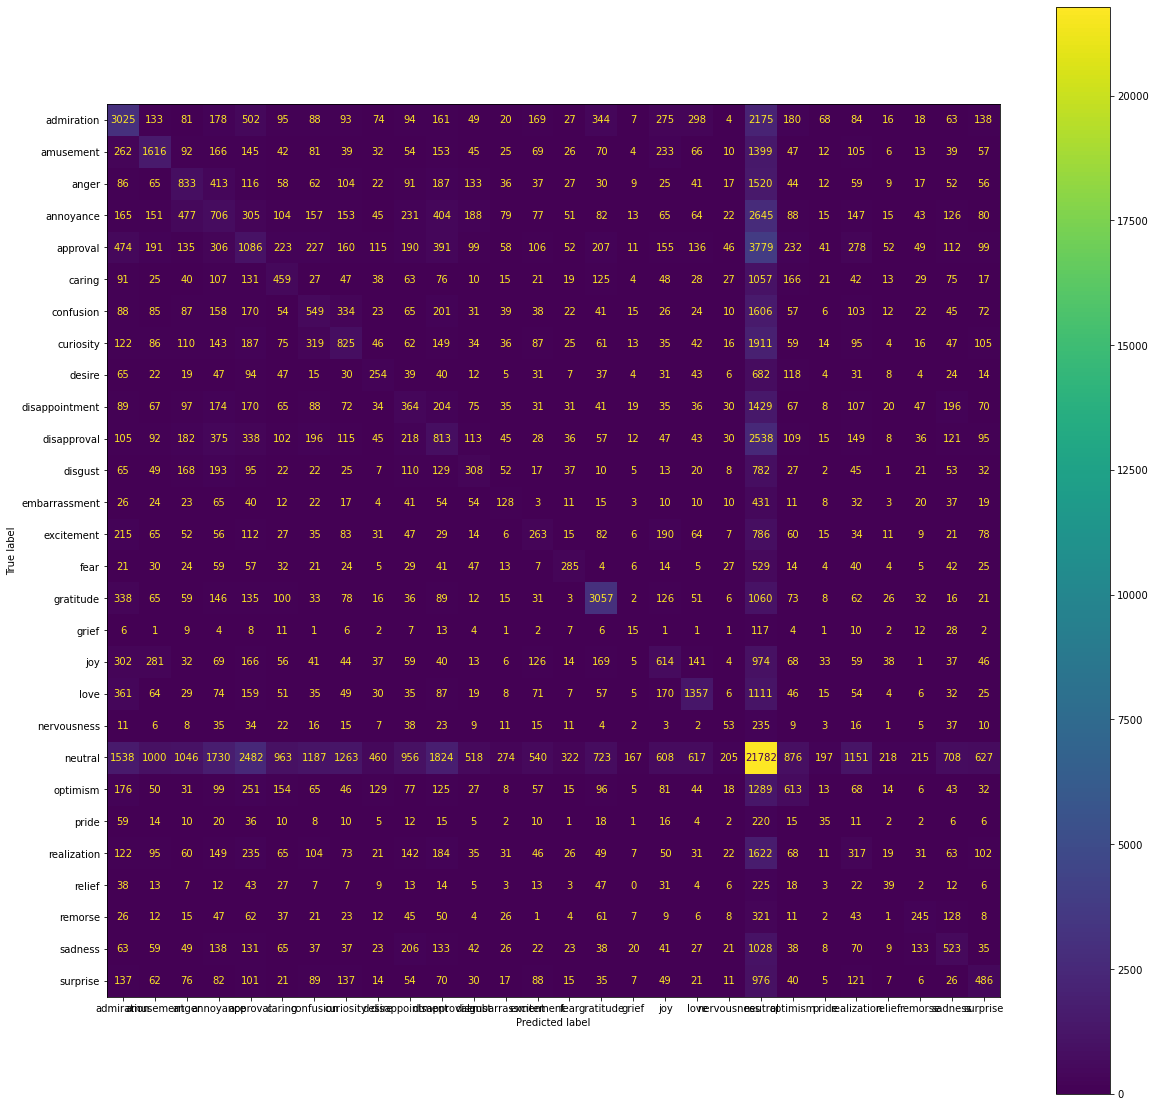

Sentiment Classification Performance Report - Top Multinomial Naive Bayes Classifier - 20/80
              precision    recall  f1-score   support

   ambiguous       0.36      0.16      0.22     15194
    negative       0.49      0.45      0.47     30921
     neutral       0.44      0.47      0.45     44291
    positive       0.58      0.69      0.63     47050

    accuracy                           0.50    137456
   macro avg       0.47      0.44      0.44    137456
weighted avg       0.49      0.50      0.49    137456



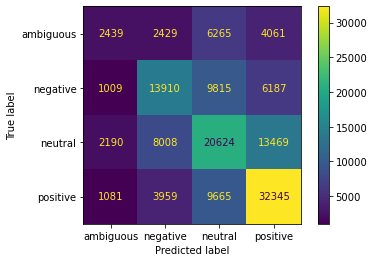

In [7]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification
topMNB_model = MultinomialNB(alpha=0)
topMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Multinomial Naive Bayes Classifier - 20/80")
prediction = topMNB_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
topMNB_model = MultinomialNB(alpha=0.5)
topMNB_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Multinomial Naive Bayes Classifier - 20/80")
prediction = topMNB_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
disp.plot()
plt.show()

### Top Decision Tree Classifier


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters 
DT_model = DecisionTreeClassifier()
hyper_parameters = {'criterion':('gini','entropy'),'max_depth':(10,15,20,25,30,50, None), 'min_samples_split':(2,3,5)}

gridSearchDT = GridSearchCV(DT_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchDT.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Decision Tree Classifier [EMOTION] Best Hyperparameter Configuration - 20/80:', gridSearchDT.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchDT.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Decision Tree Classifier [SENTIMENT] Best Hyperparameter Configuration - 20/80:', gridSearchDT.best_params_)

Top Decision Tree Classifier [EMOTION] Best Hyperparameter Configuration - 20/80: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Top Decision Tree Classifier [SENTIMENT] Best Hyperparameter Configuration - 20/80: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


Hyper parameters found using gridsearch are similar to default ones, therefore top MNB classifier should output similar result as base MNB classifier

Emotion Classification Performance Report - Top Decision Tree Classifier - 20/80
                precision    recall  f1-score   support

    admiration       0.39      0.41      0.40      8459
     amusement       0.43      0.46      0.45      4908
         anger       0.22      0.23      0.22      4161
     annoyance       0.12      0.12      0.12      6698
      approval       0.17      0.16      0.16      9010
        caring       0.15      0.15      0.15      2821
     confusion       0.17      0.17      0.17      3983
     curiosity       0.22      0.21      0.21      4724
        desire       0.20      0.17      0.18      1733
disappointment       0.12      0.12      0.12      3701
   disapproval       0.15      0.15      0.15      6063
       disgust       0.19      0.15      0.17      2318
 embarrassment       0.15      0.11      0.13      1133
    excitement       0.15      0.14      0.15      2413
          fear       0.34      0.28      0.30      1414
     gratitude       0

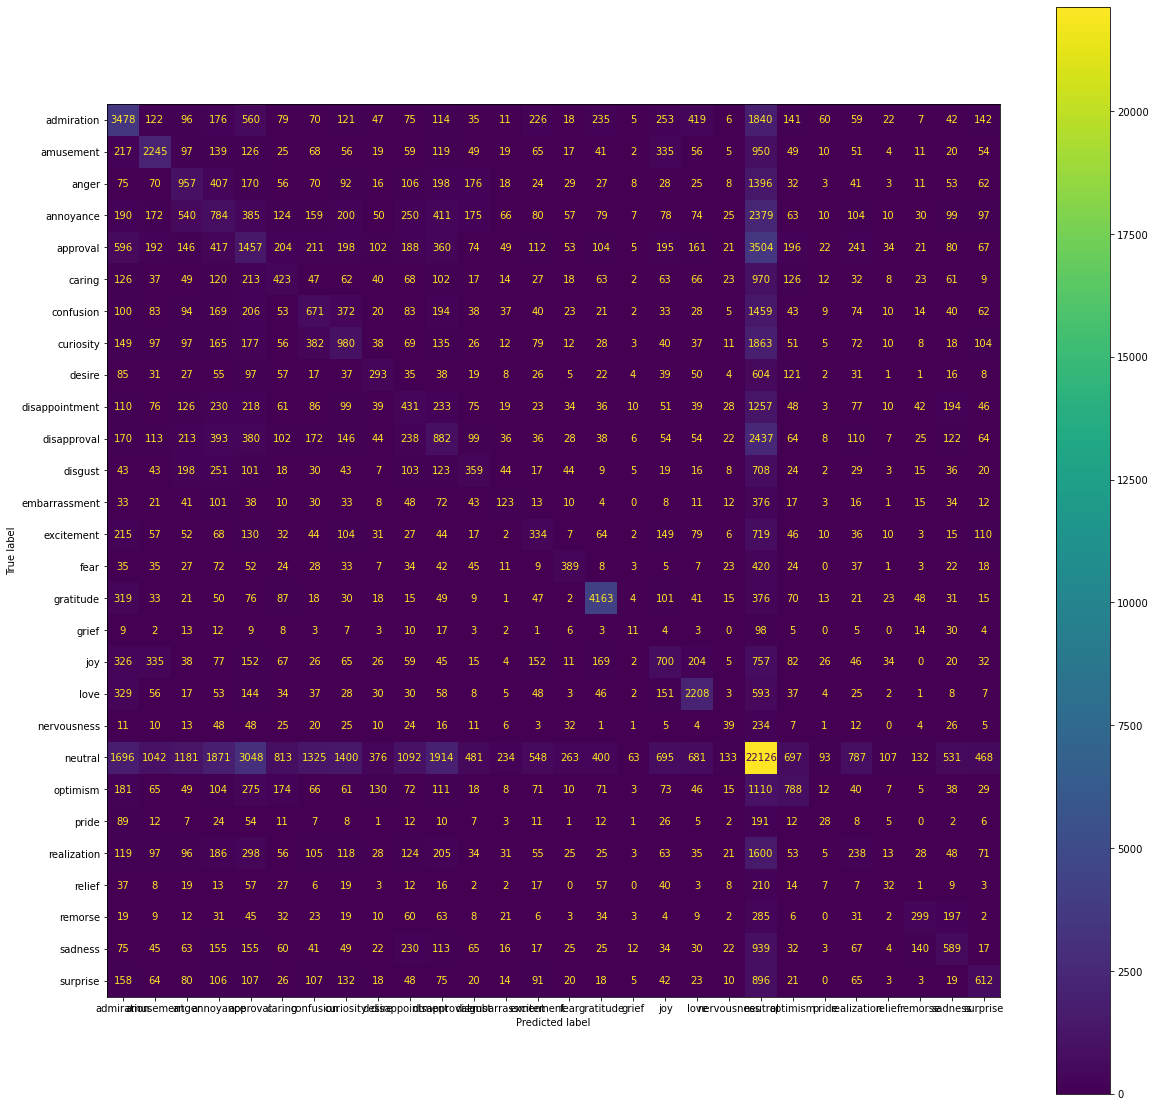

Sentiment Classification Performance Report - Top Tree Classifier - 20/80
              precision    recall  f1-score   support

   ambiguous       0.29      0.30      0.29     15194
    negative       0.44      0.44      0.44     30921
     neutral       0.44      0.46      0.45     44291
    positive       0.61      0.58      0.59     47050

    accuracy                           0.48    137456
   macro avg       0.45      0.44      0.44    137456
weighted avg       0.48      0.48      0.48    137456



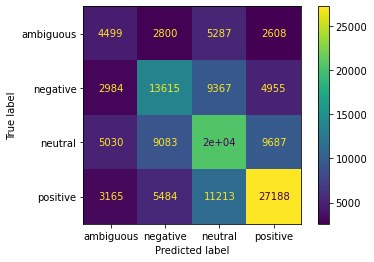

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
topDT_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2) 
topDT_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Decision Tree Classifier - 20/80")
prediction = topDT_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topDT_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 

# Note that no change in hyperparameter configuration, so the 'best' performing model is equivalent to base model.

topDT_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2) 
topDT_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Tree Classifier - 20/80")
prediction = topDT_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topDT_model.classes_)
disp.plot()
plt.show()

### Top Multi-Layered Perceptron Classifier

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Grid search best set of hyperparameters
MLP_model = MLPClassifier(max_iter=1)
hyper_parameters = {'activation':('logistic','tanh','relu','identity'),
                    'solver':('sgd', 'adam'), 'hidden_layer_sizes':((10,10,10),(30,50))}

gridSearchMLP = GridSearchCV(MLP_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMLP.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Multi-Layered Perceptron Classifier [EMOTION] Best Hyperparameter Configuration - 20/80:', gridSearchMLP.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMLP.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Multi-Layered Perceptron Classifier [SENTIMENT] Best Hyperparameter Configuration - 20/80:', gridSearchMLP.best_params_)

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

Top Multi-Layered Perceptron Classifier [EMOTION] Best Hyperparameter Configuration - 20/80: {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

Top Multi-Layered Perceptron Classifier [SENTIMENT] Best Hyperparameter Configuration - 20/80: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Emotion Classification Performance Report - Top Multi-Layered Perceptron Classifier - 20/80
                precision    recall  f1-score   support

    admiration       0.53      0.11      0.19      8459
     amusement       0.53      0.07      0.13      4908
         anger       0.00      0.00      0.00      4161
     annoyance       0.00      0.00      0.00      6698
      approval       0.17      0.00      0.00      9010
        caring       0.00      0.00      0.00      2821
     confusion       0.00      0.00      0.00      3983
     curiosity       0.00      0.00      0.00      4724
        desire       0.00      0.00      0.00      1733
disappointment       0.20      0.00      0.00      3701
   disapproval       0.11      0.00      0.00      6063
       disgust       0.00      0.00      0.00      2318
 embarrassment       0.00      0.00      0.00      1133
    excitement       0.00      0.00      0.00      2413
          fear       0.00      0.00      0.00      1414
     gratit

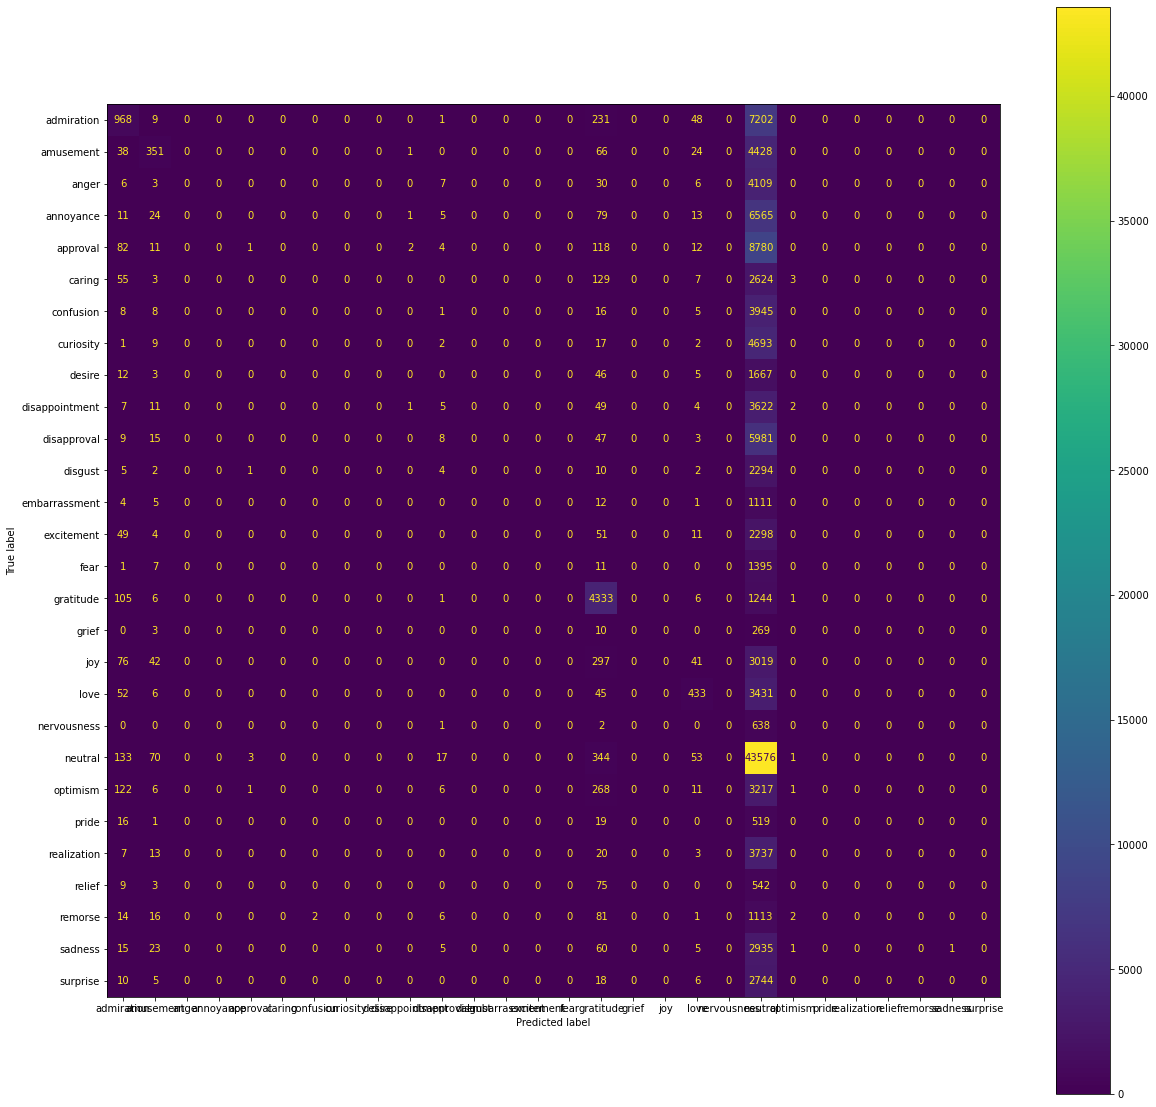

Sentiment Classification Performance Report - Top Multi-Layered Perceptron Classifier - 20/80
              precision    recall  f1-score   support

   ambiguous       0.45      0.12      0.18     15194
    negative       0.54      0.41      0.47     30921
     neutral       0.46      0.57      0.51     44291
    positive       0.61      0.71      0.65     47050

    accuracy                           0.53    137456
   macro avg       0.51      0.45      0.45    137456
weighted avg       0.53      0.53      0.51    137456



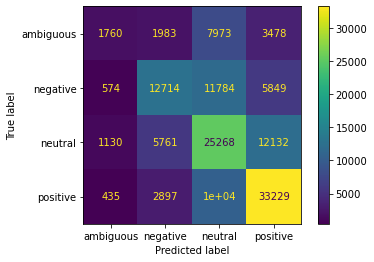

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='identity', solver='adam')
topMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Multi-Layered Perceptron Classifier - 20/80")
prediction = topMLP_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='tanh', solver='adam')
topMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Multi-Layered Perceptron Classifier - 20/80")
prediction = topMLP_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMLP_model.classes_)
disp.plot()
plt.show()

## Splitting of the dataset: 50% training, 50% testing

In [12]:

# Split into training and test sets for the emotion classifier
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.5)

# Split into training and test sets for the sentiment classifier
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X, y_sentiment, 
                                                                                            test_size=0.5)

## Model training and testing - Results
### Base Multinomial Naive Bayes Classifier


Emotion Classification Performance Report - Base Multinomial Naive Bayes Classifier - 50/50
                precision    recall  f1-score   support

    admiration       0.50      0.37      0.42      5295
     amusement       0.55      0.19      0.29      3035
         anger       0.43      0.09      0.14      2618
     annoyance       0.18      0.04      0.06      4214
      approval       0.23      0.06      0.09      5592
        caring       0.27      0.02      0.05      1815
     confusion       0.28      0.02      0.05      2468
     curiosity       0.39      0.05      0.09      2979
        desire       0.28      0.01      0.02      1069
disappointment       0.20      0.01      0.03      2372
   disapproval       0.21      0.04      0.07      3857
       disgust       0.44      0.04      0.08      1458
 embarrassment       0.25      0.00      0.00       702
    excitement       0.23      0.02      0.03      1490
          fear       0.67      0.02      0.04       873
     gratit

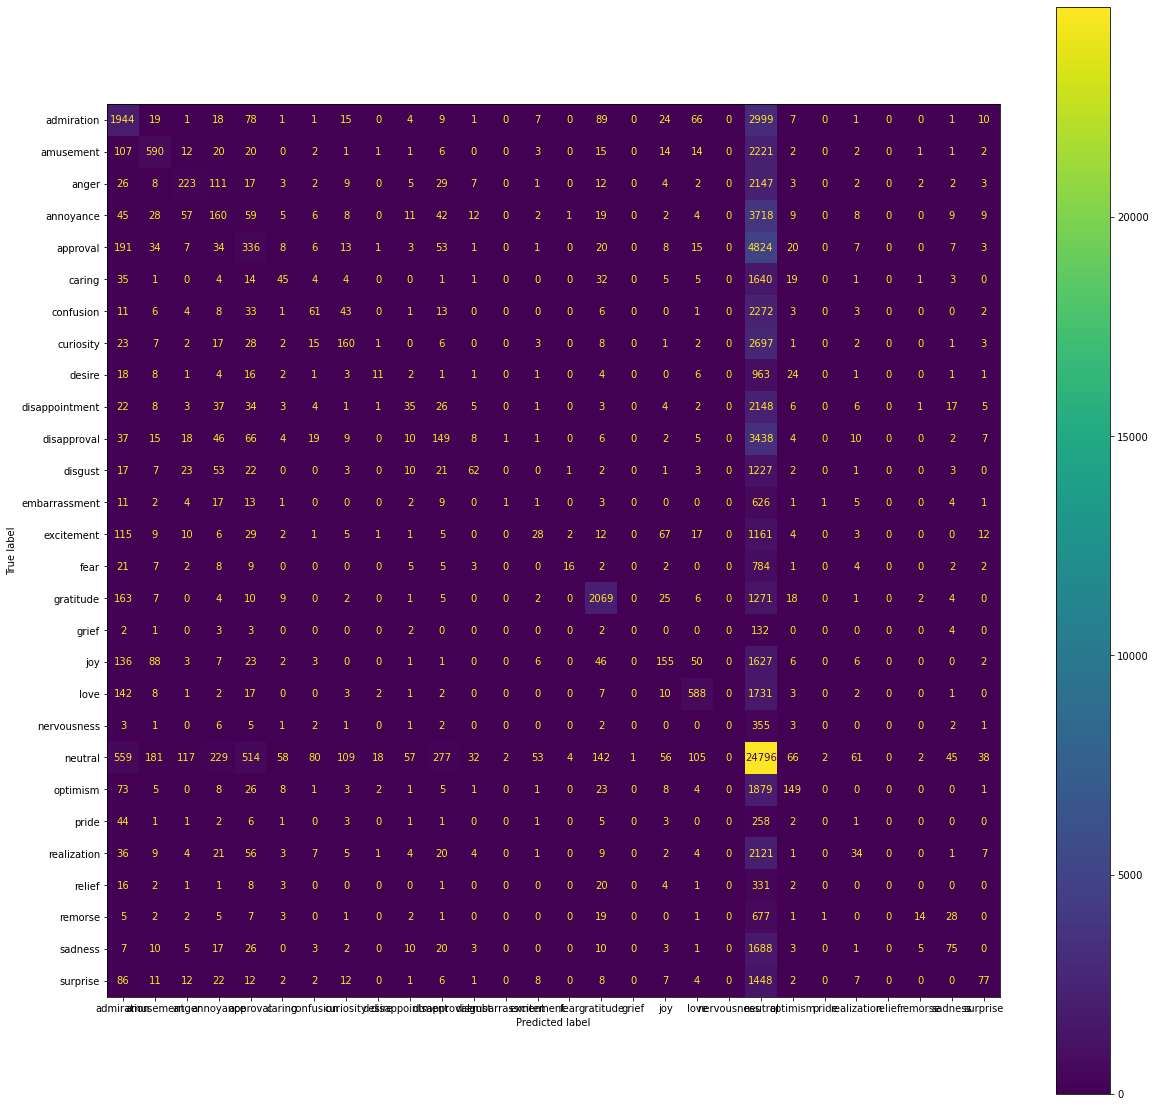

Sentiment Classification Performance Report - Base Multinomial Naive Bayes Classifier - 50/50
              precision    recall  f1-score   support

   ambiguous       0.42      0.19      0.26      9495
    negative       0.53      0.50      0.51     19283
     neutral       0.47      0.49      0.48     27753
    positive       0.60      0.70      0.65     29379

    accuracy                           0.53     85910
   macro avg       0.50      0.47      0.48     85910
weighted avg       0.52      0.53      0.52     85910



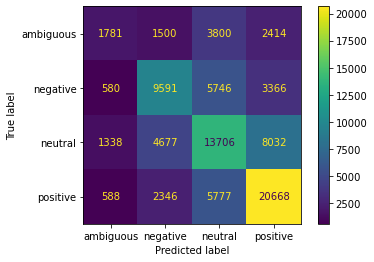

In [13]:


# Emotion Classification 
baseMNB_model = MultinomialNB() 
baseMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Multinomial Naive Bayes Classifier - 50/50")
prediction =  baseMNB_model.predict(X_test_emotion)
print(classification_report(y_test_emotion,prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMNB_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()


# Sentiment Classification 
baseMNB_model = MultinomialNB() 
baseMNB_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Multinomial Naive Bayes Classifier - 50/50")
prediction = baseMNB_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMNB_model.classes_)
disp.plot()
plt.show()

### Base Decision Tree Classifier 

Emotion Classification Performance Report - Base Decision Tree Classifier - 50/50
                precision    recall  f1-score   support

    admiration       0.40      0.50      0.45      5295
     amusement       0.41      0.50      0.45      3035
         anger       0.23      0.30      0.26      2618
     annoyance       0.15      0.18      0.16      4214
      approval       0.18      0.22      0.19      5592
        caring       0.21      0.22      0.22      1815
     confusion       0.20      0.23      0.21      2468
     curiosity       0.29      0.31      0.30      2979
        desire       0.22      0.25      0.23      1069
disappointment       0.14      0.14      0.14      2372
   disapproval       0.21      0.21      0.21      3857
       disgust       0.22      0.20      0.21      1458
 embarrassment       0.19      0.16      0.17       702
    excitement       0.19      0.18      0.19      1490
          fear       0.35      0.33      0.34       873
     gratitude       

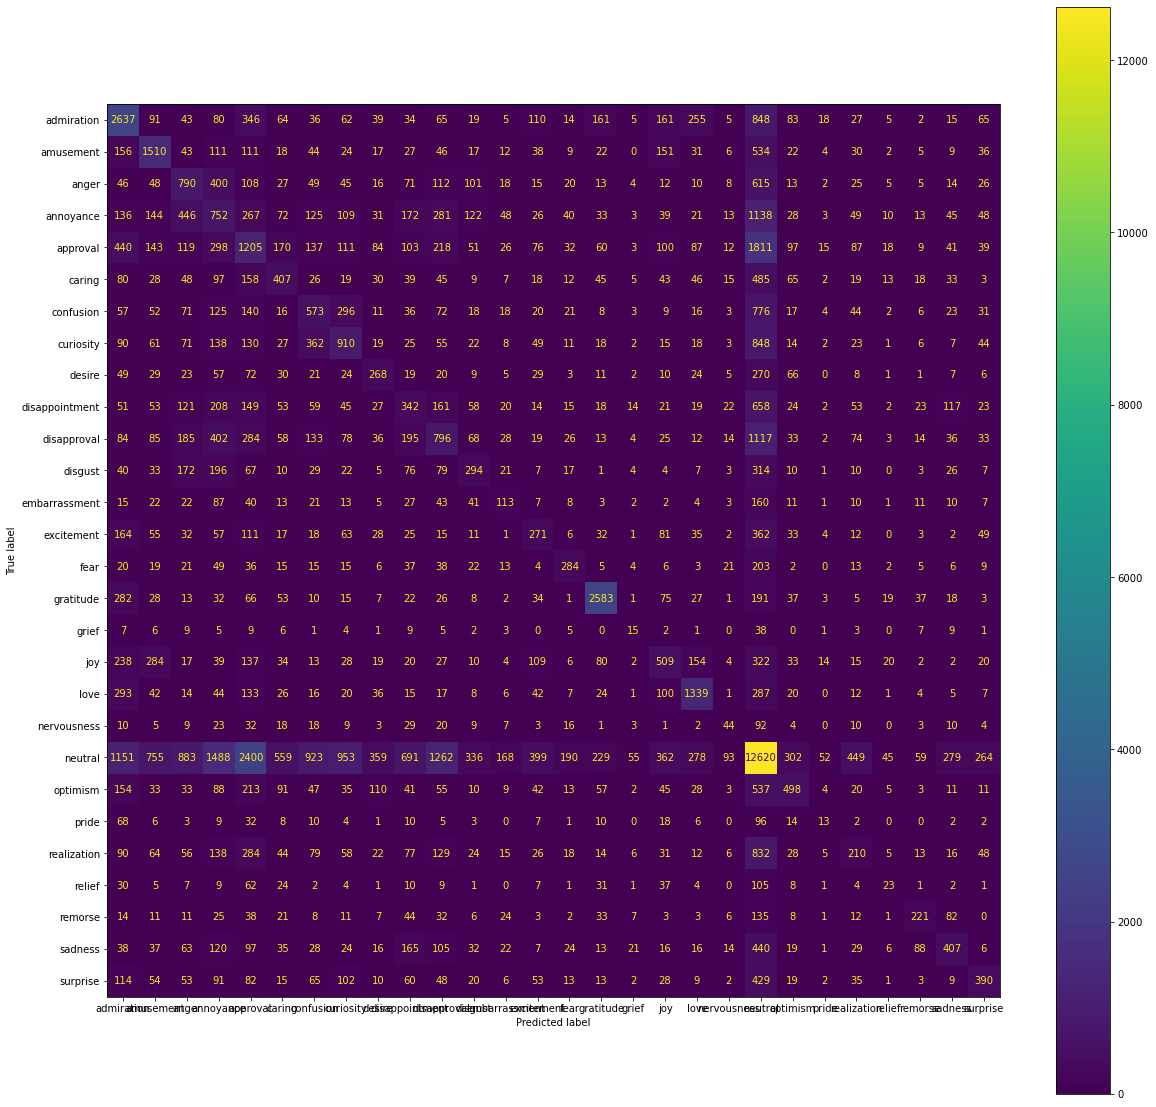

Sentiment Classification Performance Report - Base Decision Tree Classifier - 50/50
              precision    recall  f1-score   support

   ambiguous       0.33      0.41      0.37      9495
    negative       0.48      0.55      0.51     19283
     neutral       0.48      0.46      0.47     27753
    positive       0.67      0.58      0.62     29379

    accuracy                           0.52     85910
   macro avg       0.49      0.50      0.49     85910
weighted avg       0.53      0.52      0.52     85910



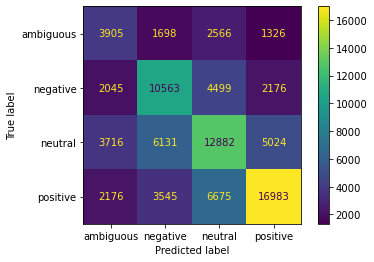

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseDT_model = DecisionTreeClassifier() 
baseDT_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Decision Tree Classifier - 50/50")
prediction = baseDT_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseDT_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
baseDT_model = DecisionTreeClassifier()
baseDT_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Decision Tree Classifier - 50/50")
prediction = baseDT_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseDT_model.classes_)
disp.plot()
plt.show()

### Base Multi-Layered Perceptron Classifier


Emotion Classification Performance Report - Base Multi-Layered Perceptron Classifier - 50/50
                precision    recall  f1-score   support

    admiration       0.44      0.45      0.45      5295
     amusement       0.44      0.46      0.45      3035
         anger       0.30      0.22      0.25      2618
     annoyance       0.16      0.17      0.16      4214
      approval       0.19      0.16      0.17      5592
        caring       0.23      0.21      0.22      1815
     confusion       0.21      0.19      0.20      2468
     curiosity       0.31      0.29      0.30      2979
        desire       0.24      0.19      0.21      1069
disappointment       0.15      0.14      0.14      2372
   disapproval       0.21      0.21      0.21      3857
       disgust       0.22      0.21      0.21      1458
 embarrassment       0.18      0.15      0.16       702
    excitement       0.18      0.20      0.19      1490
          fear       0.35      0.32      0.33       873
     grati

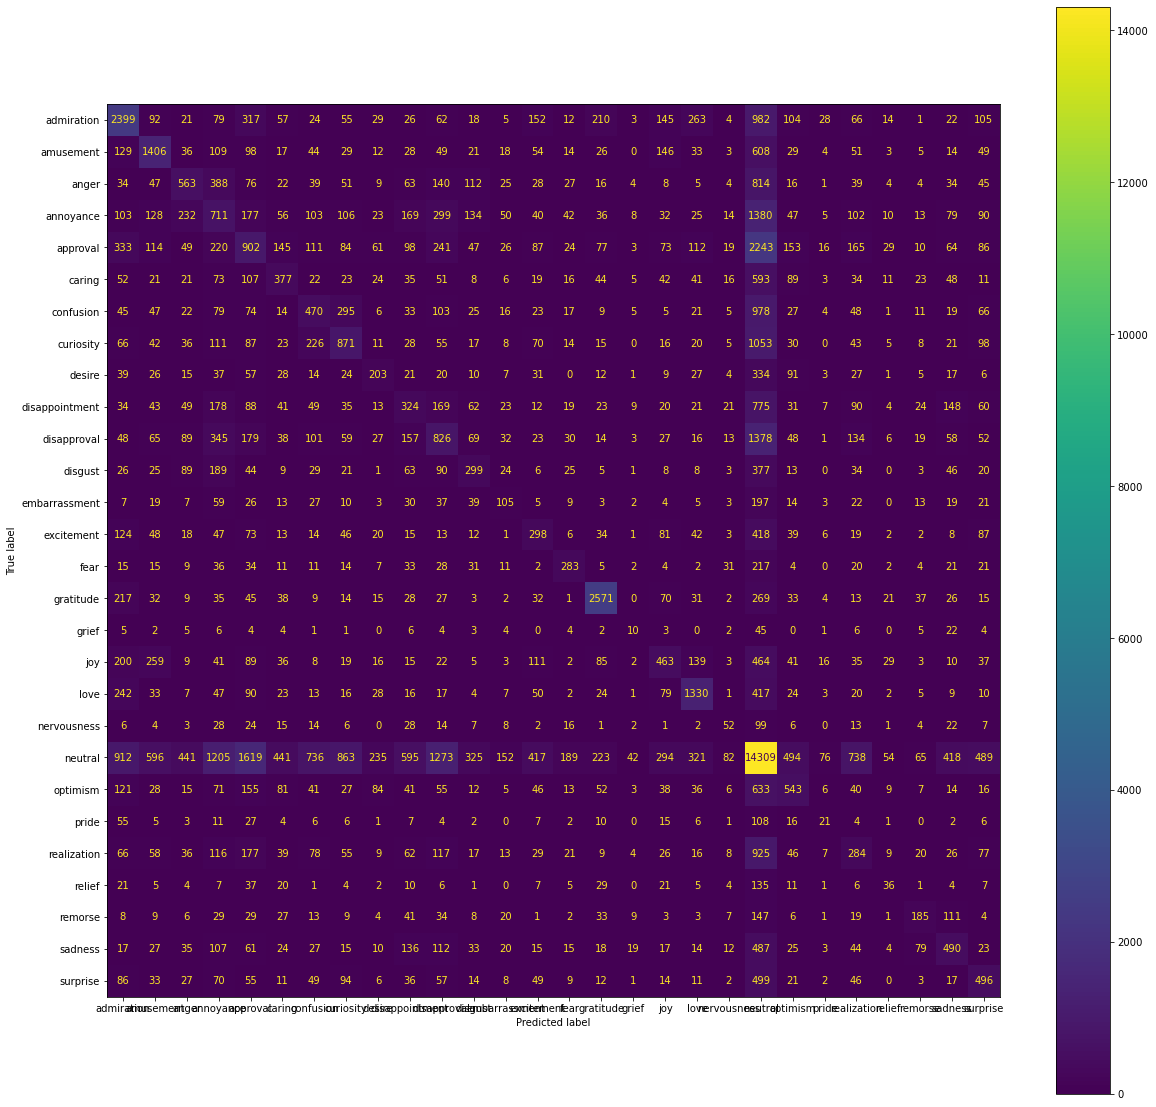

Sentiment Classification Performance Report - Base Multi-Layered Perceptron Classifier - 50/50
              precision    recall  f1-score   support

   ambiguous       0.36      0.35      0.36      9495
    negative       0.52      0.49      0.50     19283
     neutral       0.48      0.51      0.49     27753
    positive       0.64      0.63      0.63     29379

    accuracy                           0.53     85910
   macro avg       0.50      0.50      0.50     85910
weighted avg       0.53      0.53      0.53     85910



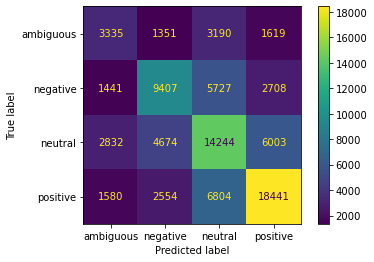

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
baseMLP_model = MLPClassifier() 
baseMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Base Multi-Layered Perceptron Classifier - 50/50")
prediction = baseMLP_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
baseMLP_model = MLPClassifier()
baseMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Base Multi-Layered Perceptron Classifier - 50/50")
prediction = baseMLP_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=baseMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseMLP_model.classes_)
disp.plot()
plt.show()

### Top Multinomial Naive Bayes Classifier
MISSING TRAINING AND RESULTS BC HYPER PARAMETERS NOT FOUND YET

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Grid search best alphafloat value
MNB_model = MultinomialNB()
hyper_parameters = {'alpha':(0, 0.5, 1, 1.5, 2, 2.5)}

gridSearchMNB = GridSearchCV(MNB_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMNB.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Multinomial Naive Bayes Classifier [EMOTION] Best Hyperparameter Configuration - 50/50:', gridSearchMNB.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMNB.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Multinomial Naive Bayes Classifier [SENTIMENT] Best Hyperparameter Configuration - 50/50:', gridSearchMNB.best_params_)

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Top Multinomial Naive Bayes Classifier [EMOTION] Best Hyperparameter Configuration - 50/50: {'alpha': 0}


/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Top Multinomial Naive Bayes Classifier [SENTIMENT] Best Hyperparameter Configuration - 50/50: {'alpha': 0.5}


Emotion Classification Performance Report - Top Multinomial Naive Bayes Classifier - 50/50
                precision    recall  f1-score   support

    admiration       0.44      0.45      0.45      5295
     amusement       0.43      0.47      0.45      3035
         anger       0.25      0.26      0.26      2618
     annoyance       0.16      0.12      0.14      4214
      approval       0.20      0.14      0.16      5592
        caring       0.18      0.24      0.21      1815
     confusion       0.20      0.19      0.20      2468
     curiosity       0.26      0.24      0.25      2979
        desire       0.21      0.24      0.22      1069
disappointment       0.14      0.12      0.13      2372
   disapproval       0.20      0.17      0.18      3857
       disgust       0.21      0.22      0.21      1458
 embarrassment       0.16      0.19      0.18       702
    excitement       0.16      0.16      0.16      1490
          fear       0.30      0.33      0.32       873
     gratitu

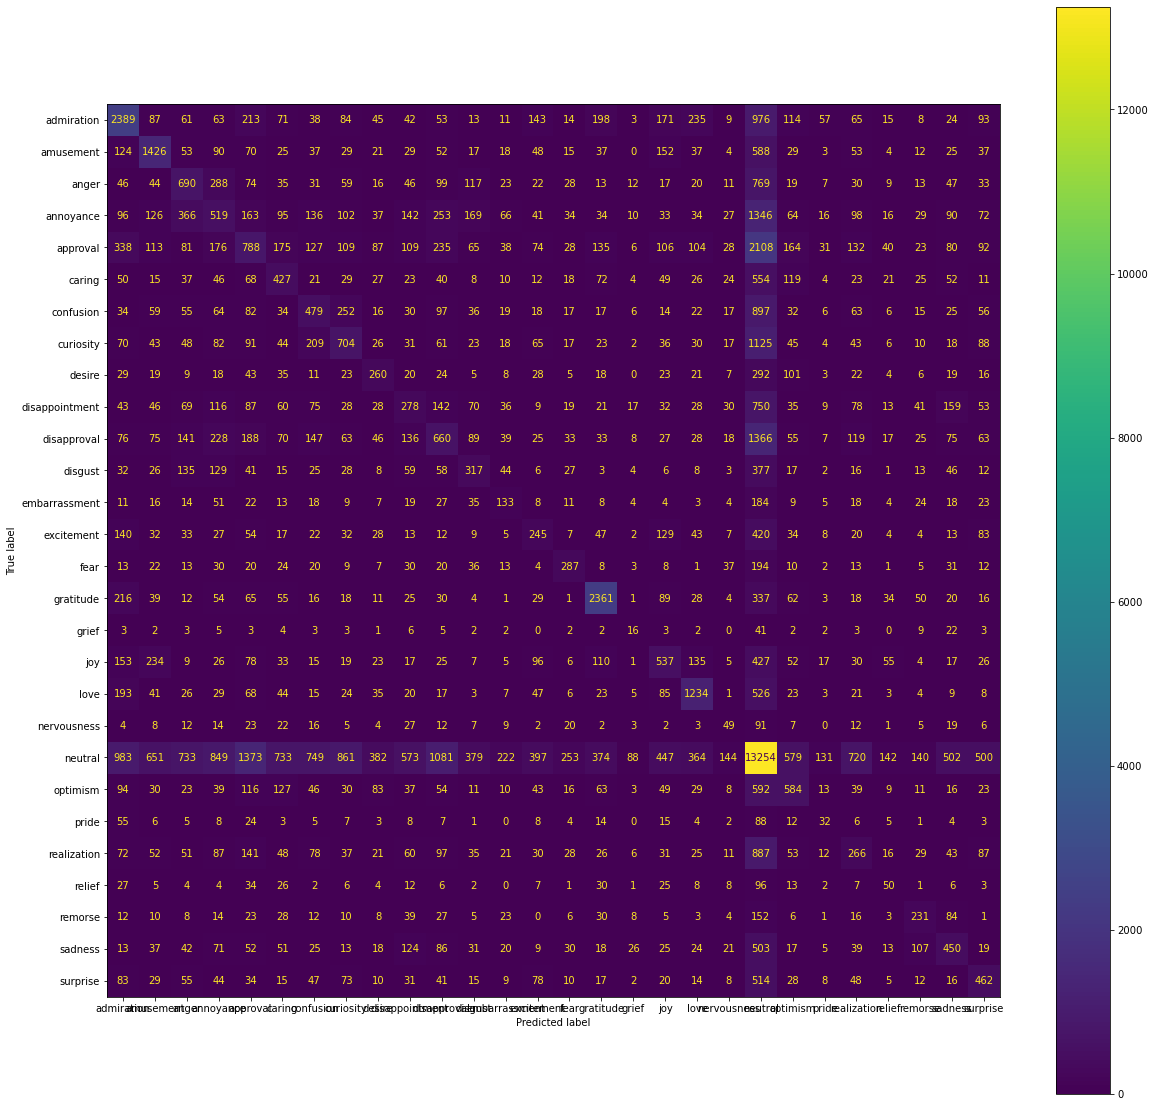

Sentiment Classification Performance Report - Top Multinomial Naive Bayes Classifier - 50/50
              precision    recall  f1-score   support

   ambiguous       0.38      0.27      0.32      9495
    negative       0.52      0.51      0.52     19283
     neutral       0.48      0.46      0.47     27753
    positive       0.61      0.69      0.65     29379

    accuracy                           0.53     85910
   macro avg       0.50      0.48      0.49     85910
weighted avg       0.52      0.53      0.52     85910



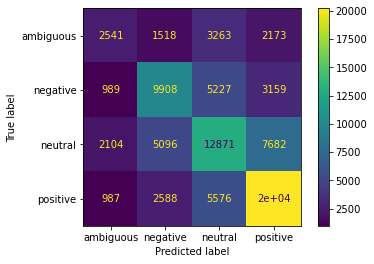

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification
topMNB_model = MultinomialNB(alpha=0)
topMNB_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Multinomial Naive Bayes Classifier - 50/50")
prediction = topMNB_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
topMNB_model = MultinomialNB(alpha=0.5)
topMNB_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Multinomial Naive Bayes Classifier - 50/50")
prediction = topMNB_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topMNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMNB_model.classes_)
disp.plot()
plt.show()

### Top Decision Tree Classifier


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters 
DT_model = DecisionTreeClassifier()
hyper_parameters = {'criterion':('gini','entropy'),'max_depth':(10,15,20,25,30,50, None), 'min_samples_split':(2,3,5)}

gridSearchDT = GridSearchCV(DT_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchDT.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Decision Tree Classifier [EMOTION] Best Hyperparameter Configuration - 50/50:', gridSearchDT.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchDT.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Decision Tree Classifier [SENTIMENT] Best Hyperparameter Configuration - 50/50:', gridSearchDT.best_params_)

Top Decision Tree Classifier [EMOTION] Best Hyperparameter Configuration - 50/50: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Top Decision Tree Classifier [SENTIMENT] Best Hyperparameter Configuration - 50/50: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


Again, even with a different test split of 50/50, the suggested hyper parameters are similar to the default ones for both classifications, therefore we expect models to behave similarly as the base ones. 

Emotion Classification Performance Report - Top Decision Tree Classifier - 50/50
                precision    recall  f1-score   support

    admiration       0.40      0.50      0.44      5295
     amusement       0.40      0.49      0.45      3035
         anger       0.23      0.30      0.26      2618
     annoyance       0.14      0.18      0.16      4214
      approval       0.18      0.22      0.19      5592
        caring       0.21      0.22      0.22      1815
     confusion       0.20      0.23      0.21      2468
     curiosity       0.29      0.30      0.30      2979
        desire       0.22      0.25      0.24      1069
disappointment       0.14      0.14      0.14      2372
   disapproval       0.21      0.20      0.21      3857
       disgust       0.23      0.20      0.21      1458
 embarrassment       0.19      0.17      0.18       702
    excitement       0.19      0.18      0.18      1490
          fear       0.36      0.33      0.34       873
     gratitude       0

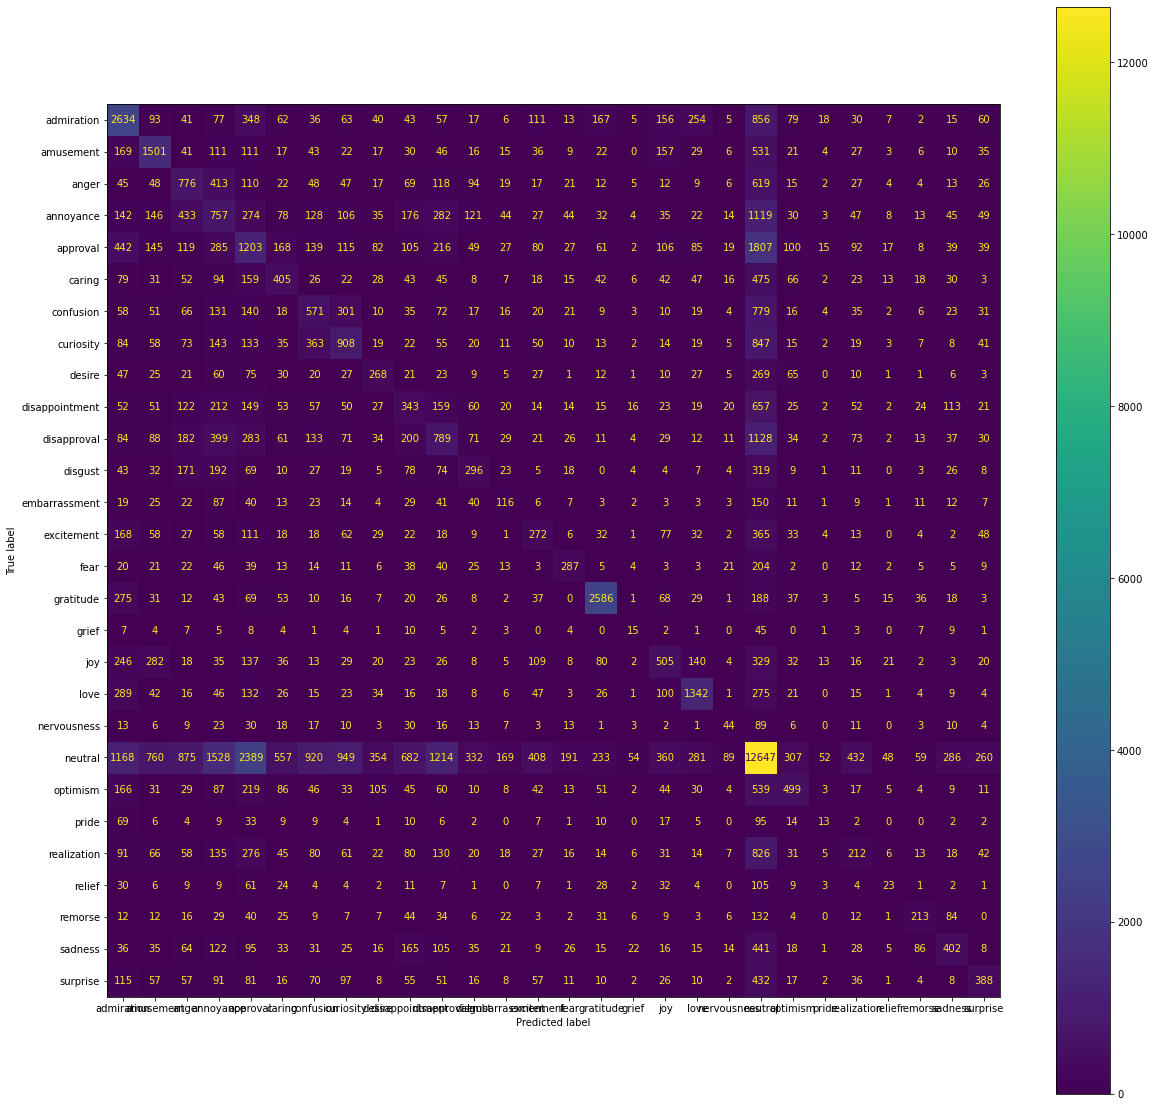

Sentiment Classification Performance Report - Top Decision Tree Classifier - 50/50
              precision    recall  f1-score   support

   ambiguous       0.33      0.41      0.37      9495
    negative       0.48      0.55      0.51     19283
     neutral       0.48      0.46      0.47     27753
    positive       0.66      0.58      0.62     29379

    accuracy                           0.52     85910
   macro avg       0.49      0.50      0.49     85910
weighted avg       0.53      0.52      0.52     85910



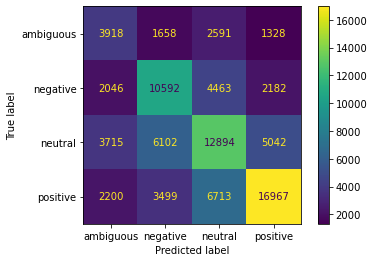

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
topDT_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2) 
topDT_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Decision Tree Classifier - 50/50")
prediction = topDT_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topDT_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 

# No change in hyperparameter configuration, so the 'best' performing model is equivalent to base model.
# Because of this, we will not gather the performance report of the top model, and can refer to the base model
# for performance metrics.

# Sentiment Classification 
topDT_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=2) 
topDT_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Decision Tree Classifier - 50/50")
prediction = topDT_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topDT_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topDT_model.classes_)
disp.plot()
plt.show()

### Top Multi-Layered Perceptron Classifier

In [20]:
from sklearn.model_selection import GridSearchCV

# Grid search best set of hyperparameters
MLP_model = MLPClassifier(max_iter=1)
hyper_parameters = {'activation':('logistic','tanh','relu','identity'),
                    'solver':('sgd', 'adam'), 'hidden_layer_sizes':((10,10,10),(30,50))}

gridSearchMLP = GridSearchCV(MLP_model, hyper_parameters, n_jobs=-1, scoring='f1_weighted')

# Print the best found hyperparameter configuration and validation accuracy for emotion classification
gridSearchMLP.fit(X_train_emotion, y_train_emotion.ravel())
print('Top Multi-Layered Perceptron Classifier [EMOTION] Best Hyperparameter Configuration - 50/50:', gridSearchMLP.best_params_)

# Print the best found hyperparameter configuration and validation accuracy for sentiment classification
gridSearchMLP.fit(X_train_sentiment, y_train_sentiment.ravel())
print('Top Multi-Layered Perceptron Classifier [SENTIMENT] Best Hyperparameter Configuration - 50/50:', gridSearchMLP.best_params_)

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

Top Multi-Layered Perceptron Classifier [EMOTION] Best Hyperparameter Configuration - 50/50: {'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsashah

Top Multi-Layered Perceptron Classifier [SENTIMENT] Best Hyperparameter Configuration - 50/50: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Emotion Classification Performance Report - Top Multi-Layered Perceptron Classifier - 50/50
                precision    recall  f1-score   support

    admiration       0.51      0.46      0.48      5295
     amusement       0.53      0.56      0.54      3035
         anger       0.36      0.15      0.21      2618
     annoyance       0.18      0.03      0.06      4214
      approval       0.45      0.01      0.02      5592
        caring       0.26      0.01      0.02      1815
     confusion       0.38      0.04      0.08      2468
     curiosity       0.33      0.10      0.15      2979
        desire       0.48      0.09      0.15      1069
disappointment       0.11      0.00      0.00      2372
   disapproval       0.18      0.03      0.06      3857
       disgust       0.67      0.05      0.09      1458
 embarrassment       0.00      0.00      0.00       702
    excitement       0.75      0.00      0.00      1490
          fear       1.00      0.00      0.00       873
     gratit

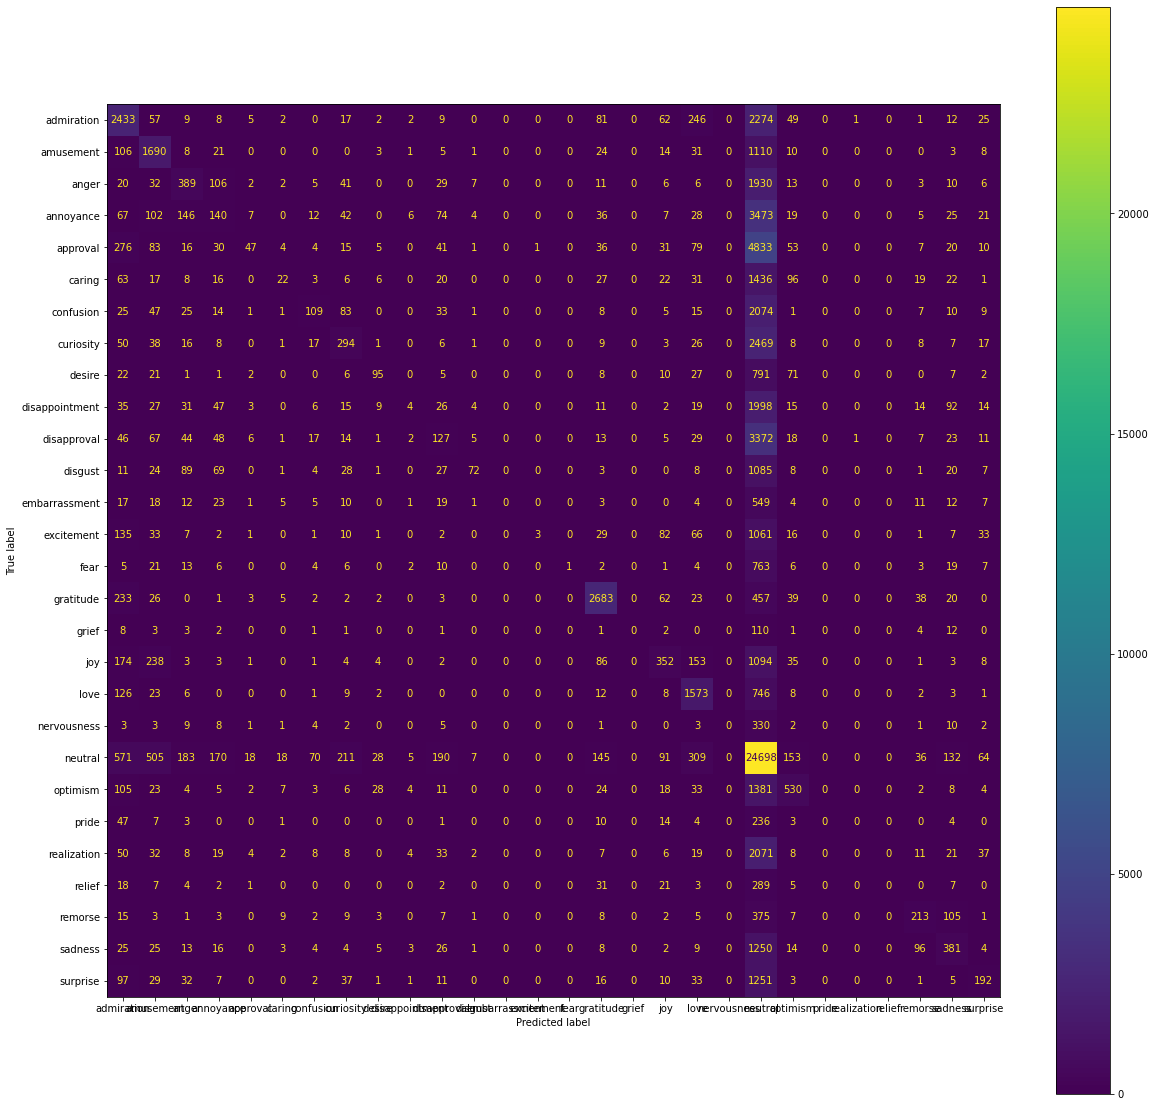

Sentiment Classification Performance Report - Top Multi-Layered Perceptron Classifier - 50/50
              precision    recall  f1-score   support

   ambiguous       0.47      0.18      0.26      9495
    negative       0.56      0.49      0.52     19283
     neutral       0.47      0.62      0.53     27753
    positive       0.67      0.66      0.67     29379

    accuracy                           0.56     85910
   macro avg       0.54      0.49      0.50     85910
weighted avg       0.56      0.56      0.55     85910



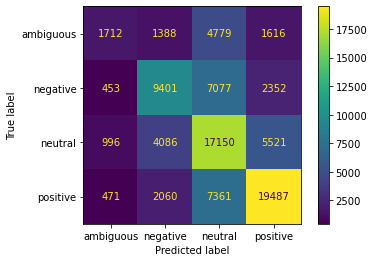

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Emotion Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='identity', solver='adam')
topMLP_model.fit(X_train_emotion, y_train_emotion.ravel()) # Training step
print("Emotion Classification Performance Report - Top Multi-Layered Perceptron Classifier - 50/50")
prediction = topMLP_model.predict(X_test_emotion)
print(classification_report(y_test_emotion, prediction))
cm = confusion_matrix(y_test_emotion, prediction, labels=topMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMLP_model.classes_)
fig, ax = plt.subplots(figsize = (20, 20))
disp.plot(ax=ax)
plt.show()

# Sentiment Classification 
topMLP_model = MLPClassifier(max_iter=1, hidden_layer_sizes=(30,50), activation='tanh', solver='adam')
topMLP_model.fit(X_train_sentiment, y_train_sentiment.ravel()) # Training step
print("Sentiment Classification Performance Report - Top Multi-Layered Perceptron Classifier - 50/50")
prediction = topMLP_model.predict(X_test_sentiment)
print(classification_report(y_test_sentiment, prediction))
cm = confusion_matrix(y_test_sentiment, prediction, labels=topMLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=topMLP_model.classes_)
disp.plot()
plt.show()